In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def readFromExcelToDataFrame():
    return pd.read_excel('data_samples/synthetic_data_1_with_outlier.xlsx', 'Sheet1', index_col=0, parse_dates=True)

In [3]:
df = readFromExcelToDataFrame()
df.info

<bound method DataFrame.info of          Dates      Values
106 2021-04-17   67.521207
259 2021-09-17   48.199839
45  2021-02-15   59.806637
26  2021-01-27   32.330560
78  2021-03-20    5.271282
346 2021-12-13   83.869323
90  2021-04-01   12.674836
311 2021-11-08   18.936241
239 2021-08-28   33.398948
6   2021-01-07   57.313268
120 2021-05-01   38.481294
141 2021-05-22   67.767056
263 2021-09-21   44.273419
286 2021-10-14   68.918716
299 2021-10-27   62.506032
210 2021-07-30   50.592697
294 2021-10-22   75.035261
101 2021-04-12  200.000000
221 2021-08-10   41.776030
140 2021-05-21   69.891985
142 2021-05-23   22.826498
199 2021-07-19   75.735105
59  2021-03-01   70.059918
293 2021-10-21   67.480641
302 2021-10-30    1.727126
254 2021-09-12   10.906504
68  2021-03-10   25.500970
332 2021-11-29   61.314042
113 2021-04-24  150.000000
191 2021-07-11   86.612496
..         ...         ...
197 2021-07-17   27.740341
243 2021-09-01   89.816329
115 2021-04-26   85.614853
265 2021-09-23   25.322

In [4]:
def get_max_min_values_of_col_in_df(df, col_name):
    column = df[col_name]
    max_value = column.max()
    min_value = column.min()
    return dict(max_value = max_value, 
                min_value = min_value)  

#Calculation of max and min values for passed data frame and column name
max_min_value = get_max_min_values_of_col_in_df(df=df, col_name='Values')
print(max_min_value)

{'max_value': 200.0, 'min_value': -100.0}


In [5]:
pd.to_datetime(df['Dates'])
pd.to_timedelta(df['Dates'])
df.info

<bound method DataFrame.info of          Dates      Values
106 2021-04-17   67.521207
259 2021-09-17   48.199839
45  2021-02-15   59.806637
26  2021-01-27   32.330560
78  2021-03-20    5.271282
346 2021-12-13   83.869323
90  2021-04-01   12.674836
311 2021-11-08   18.936241
239 2021-08-28   33.398948
6   2021-01-07   57.313268
120 2021-05-01   38.481294
141 2021-05-22   67.767056
263 2021-09-21   44.273419
286 2021-10-14   68.918716
299 2021-10-27   62.506032
210 2021-07-30   50.592697
294 2021-10-22   75.035261
101 2021-04-12  200.000000
221 2021-08-10   41.776030
140 2021-05-21   69.891985
142 2021-05-23   22.826498
199 2021-07-19   75.735105
59  2021-03-01   70.059918
293 2021-10-21   67.480641
302 2021-10-30    1.727126
254 2021-09-12   10.906504
68  2021-03-10   25.500970
332 2021-11-29   61.314042
113 2021-04-24  150.000000
191 2021-07-11   86.612496
..         ...         ...
197 2021-07-17   27.740341
243 2021-09-01   89.816329
115 2021-04-26   85.614853
265 2021-09-23   25.322

(array([737791., 737850., 737911., 737972., 738034., 738095., 738156.]),
 <a list of 7 Text xticklabel objects>)

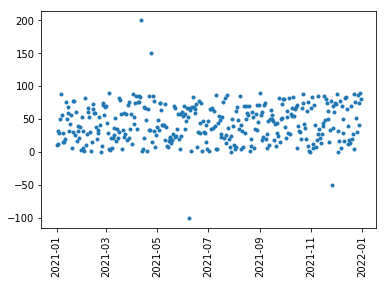

In [6]:
plt.plot(df['Dates'], df['Values'], '.')
plt.xticks(rotation='vertical')

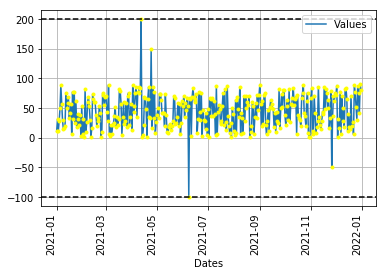

In [7]:
ts = df.set_index('Dates')
ts.plot(grid=True)

plt.plot(df['Dates'], df['Values'], '.', color='yellow')
plt.xticks(rotation='vertical')
plt.axhline(y=max_min_value['max_value'], color="black", linestyle="--")
plt.axhline(y=max_min_value['min_value'], color="black", linestyle="--")

In [8]:
import numpy as np
from scipy import stats
cols = ['Values']
z_scores = stats.zscore(df[cols])
print(len(z_scores), z_scores)



365 [[ 8.18315735e-01]
 [ 1.46907220e-01]
 [ 5.50238021e-01]
 [-4.04542828e-01]
 [-1.34484010e+00]
 [ 1.38640516e+00]
 [-1.08757006e+00]
 [-8.69989152e-01]
 [-3.67416843e-01]
 [ 4.63594630e-01]
 [-1.90807683e-01]
 [ 8.26858871e-01]
 [ 1.04659581e-02]
 [ 8.66878526e-01]
 [ 6.44040746e-01]
 [ 2.30057928e-01]
 [ 1.07942560e+00]
 [ 5.42189199e+00]
 [-7.63171427e-02]
 [ 9.00699170e-01]
 [-7.34804525e-01]
 [ 1.10374486e+00]
 [ 9.06534754e-01]
 [ 8.16906103e-01]
 [-1.46799788e+00]
 [-1.14901877e+00]
 [-6.41867895e-01]
 [ 6.02619645e-01]
 [ 3.68441532e+00]
 [ 1.48172912e+00]
 [ 1.06088833e+00]
 [-1.46025555e+00]
 [-3.89362404e-01]
 [ 5.72845230e-01]
 [-1.18062723e+00]
 [ 1.53520234e+00]
 [ 8.48871304e-03]
 [-1.18483040e+00]
 [-5.21292353e-01]
 [-1.39569654e+00]
 [-8.27024679e-01]
 [-1.49795420e+00]
 [-1.11854110e+00]
 [-8.73117108e-01]
 [-4.38654609e-01]
 [ 1.37952044e+00]
 [-1.35955996e+00]
 [ 6.74900335e-01]
 [ 9.83384655e-01]
 [-7.61159098e-01]
 [ 1.09244089e+00]
 [-1.33072385e+00]
 [ 3.186

In [9]:
# numpy.absolute
abs_z_scores = np.abs(z_scores)
print(len(abs_z_scores),abs_z_scores)


365 [[8.18315735e-01]
 [1.46907220e-01]
 [5.50238021e-01]
 [4.04542828e-01]
 [1.34484010e+00]
 [1.38640516e+00]
 [1.08757006e+00]
 [8.69989152e-01]
 [3.67416843e-01]
 [4.63594630e-01]
 [1.90807683e-01]
 [8.26858871e-01]
 [1.04659581e-02]
 [8.66878526e-01]
 [6.44040746e-01]
 [2.30057928e-01]
 [1.07942560e+00]
 [5.42189199e+00]
 [7.63171427e-02]
 [9.00699170e-01]
 [7.34804525e-01]
 [1.10374486e+00]
 [9.06534754e-01]
 [8.16906103e-01]
 [1.46799788e+00]
 [1.14901877e+00]
 [6.41867895e-01]
 [6.02619645e-01]
 [3.68441532e+00]
 [1.48172912e+00]
 [1.06088833e+00]
 [1.46025555e+00]
 [3.89362404e-01]
 [5.72845230e-01]
 [1.18062723e+00]
 [1.53520234e+00]
 [8.48871304e-03]
 [1.18483040e+00]
 [5.21292353e-01]
 [1.39569654e+00]
 [8.27024679e-01]
 [1.49795420e+00]
 [1.11854110e+00]
 [8.73117108e-01]
 [4.38654609e-01]
 [1.37952044e+00]
 [1.35955996e+00]
 [6.74900335e-01]
 [9.83384655e-01]
 [7.61159098e-01]
 [1.09244089e+00]
 [1.33072385e+00]
 [3.18670840e-01]
 [8.50223052e-01]
 [1.57373673e-02]
 [1.06

In [10]:
filtered_entries = (abs_z_scores < 3).all(axis=1)
print(len(filtered_entries),filtered_entries)

365 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  Tru

In [11]:
df2 = df[filtered_entries]
df2.info

<bound method DataFrame.info of          Dates     Values
106 2021-04-17  67.521207
259 2021-09-17  48.199839
45  2021-02-15  59.806637
26  2021-01-27  32.330560
78  2021-03-20   5.271282
346 2021-12-13  83.869323
90  2021-04-01  12.674836
311 2021-11-08  18.936241
239 2021-08-28  33.398948
6   2021-01-07  57.313268
120 2021-05-01  38.481294
141 2021-05-22  67.767056
263 2021-09-21  44.273419
286 2021-10-14  68.918716
299 2021-10-27  62.506032
210 2021-07-30  50.592697
294 2021-10-22  75.035261
221 2021-08-10  41.776030
140 2021-05-21  69.891985
142 2021-05-23  22.826498
199 2021-07-19  75.735105
59  2021-03-01  70.059918
293 2021-10-21  67.480641
302 2021-10-30   1.727126
254 2021-09-12  10.906504
68  2021-03-10  25.500970
332 2021-11-29  61.314042
191 2021-07-11  86.612496
124 2021-05-05  74.501807
102 2021-04-13   1.949930
..         ...        ...
197 2021-07-17  27.740341
243 2021-09-01  89.816329
115 2021-04-26  85.614853
265 2021-09-23  25.322430
72  2021-03-14  34.997386
333 20

In [12]:
#Calculation of new max and min values for passed data frame and column name
max_min_value = get_max_min_values_of_col_in_df(df=df2, col_name='Values')
print(max_min_value)

{'max_value': 89.96808251030659, 'min_value': 0.865061756423273}


(array([737791., 737850., 737911., 737972., 738034., 738095., 738156.]),
 <a list of 7 Text xticklabel objects>)

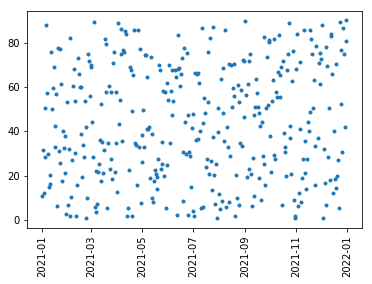

In [13]:
plt.plot(df2['Dates'], df2['Values'], '.')
plt.xticks(rotation='vertical')

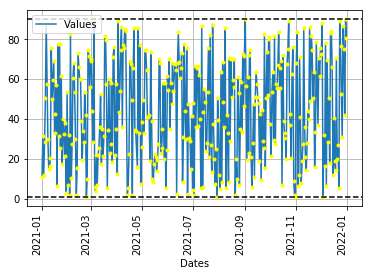

In [14]:
ts = df2.set_index('Dates')
ts.plot(grid=True)

plt.plot(df2['Dates'], df2['Values'], '.', color='yellow')
plt.xticks(rotation='vertical')
plt.axhline(y=max_min_value['max_value'], color="black", linestyle="--")
plt.axhline(y=max_min_value['min_value'], color="black", linestyle="--")
